<font size = 4> <b>G2M insight for Cab Investment firm </b> </font>

<b>Cabinvest</b>

Cabinvest is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<b>Project delivery:</b>

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

<b> GUIDE </b><br>
You should fully investigate and understand each data set.

Review the Source Documentation <font color = 'green'><b> ✔ </b></font><br>
Understand the field names and data types <font color = 'green'><b> ✔ </b></font><br>
Identify relationships across the files<font color = 'green'><b> ✔ </b></font><br>
Field/feature transformations<font color = 'green'><b> ✔ </b></font><br>
Determine which files should be joined versus which ones should be appended<font color = 'green'><b> ✔ </b></font><br>
Create master data and explain the relationship<font color = 'green'><b> ✔ </b></font><br>
Identify and remove duplicates<font color = 'green'><b> ✔ </b></font><br>
Perform other analysis like NA value and outlier detection<br>

### Import Libraries

In [1]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

___

### Import Dataframes

##### <b>List all files in current directory</b>

In [2]:
files = [f for f in os.listdir(os.curdir) if os.path.isfile(f)]
files

['Cab_Data.csv',
 'City.csv',
 'Customer_ID.csv',
 'EDA Notebook v2.ipynb',
 'EDA Notebook.ipynb',
 'README.md',
 'Transaction_ID.csv']

<b>Extract the CSV file path into a new list</b>

In [3]:
csv_files = [csv for csv in files if csv.endswith('.csv')]
csv_files

['Cab_Data.csv', 'City.csv', 'Customer_ID.csv', 'Transaction_ID.csv']

<i> In the steps above, all the files were listed and added into the <b>files</b> variable. The two steps could of been combined, but for sanity check, all the files were listed, then in the <b>csv_files</b> variable, the CSV files were listed.

___

##### <b> Read the CSV files listed in the variable </b> <i>csv_files</i>

In [4]:
dataframes = {}

for csv_file in csv_files:
    # Extract the file name (without extension) as the variable name
    variable_name = csv_file.split('/')[-1].split('.')[0]  # Assumes '/' is the path separator

    # Read the CSV file into a DataFrame
    dataframes[variable_name] = pd.read_csv(csv_file)

# Print the .head() of each DataFrame
for variable_name, df in dataframes.items():
    print(f"Variable Name: {variable_name}")
    print(df.head(3))
    print("\n")
    print(df.info())
    print("Dataframe size:", df.shape)
    print("NaN values in dataset:", df.isna().sum().sum())
    print("\n")
    

Variable Name: Cab_Data
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64

In [5]:
dataframes.keys()

dict_keys(['Cab_Data', 'City', 'Customer_ID', 'Transaction_ID'])

In [6]:
# dataframes['Cab_Data']
# dataframes['City']
# dataframes['Customer_ID']
# dataframes['Transaction_ID']

<i> Now we read all the CSV files and are properly stored into the dictionary <b>dataframes</b>. The Dataframes can be seen by refering to the dictionary keys above. <br>
The dictionary keys are as follows:
    <ul>
        <li>Cab_Data</li>
        <li>City</li>
        <li>Customer_ID</li>
        <li>Transaction_ID</li>
    </ul>

Above is a preview of each dataframe, the info, size and any NaN values it may have. Suprisingly, there is no NaN values, so the next step would be to combine the dataframes into one master dataframe, then clean it up to avoid double work. </i>

___

##### <b> Combine Dataframes into a Master Dataframe </b>

###### <i>Merge Dataframes</i> (Customer ID and Transaction ID)

In [7]:
customer_transaction_merged_df = pd.merge(dataframes['Customer_ID'], dataframes['Transaction_ID'], on='Customer ID')

In [8]:
customer_transaction_merged_df.head(3)

Customer ID Gender  Age  Income (USD/Month)  Transaction ID Payment_Mode
0        29290   Male   28               10813        10000011         Card
1        29290   Male   28               10813        10351127         Cash
2        29290   Male   28               10813        10412921         Card

###### <i>Merge Dataframes</i> (Cab Data and City)

In [9]:
cab_city_merged_df = pd.merge(dataframes['Cab_Data'], dataframes['City'], on='City')

In [10]:
cab_city_merged_df.head(3)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   

   Price Charged  Cost of Trip Population     Users  
0         370.95       313.635   814,885    24,701   
1         358.52       334.854   814,885    24,701   
2         125.20        97.632   814,885    24,701

###### <b><font color = 'red'>[Master Dataframe]</font></b> <i>Merge Dataframes</i> (customer_transaction_merged_df and cab_city_merged_df)

In [11]:
master_df = pd.merge(cab_city_merged_df, customer_transaction_merged_df, on='Transaction ID')

In [12]:
master_df.head(3)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   

   Price Charged  Cost of Trip Population     Users  Customer ID Gender  Age  \
0         370.95       313.635   814,885    24,701         29290   Male   28   
1         358.52       334.854   814,885    24,701         27703   Male   27   
2         125.20        97.632   814,885    24,701         28712   Male   53   

   Income (USD/Month) Payment_Mode  
0               10813         Card  
1                9237         Card  
2               11242         Cash

The Master Dataframe was created by first merging the Cab Data with the City Dataframes by 'City', then merging Customer ID with Transaction ID by 'Transaction ID', and finally merging it all together using 'Transaction ID' to create the Master Dataframe. <br>


### Data Preparation

##### Data Cleaning

<i>Before deep exploration, the Master Dataframe needs to be cleaned, making sure the format is consistent, adding features that can better improve the analysis, and removing any unecessary columns that are irrelevant to the scope of the analysis at hand.</i>

###### <i>Replacing the columns to include underscore, instead of spacing

In [13]:
#List of columns in the master dataframe
master_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Customer ID',
       'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode'],
      dtype='object')

In [14]:
#Rename one column
master_df = master_df.rename(columns = {'Income (USD/Month)':'Income_USD_Month'})
#Replace the spacing in the column name with underscore
master_df.columns = master_df.columns.str.replace(' ', '_')

In [15]:
#Sanity check
master_df.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Population', 'Users', 'Customer_ID',
       'Gender', 'Age', 'Income_USD_Month', 'Payment_Mode'],
      dtype='object')

##### Renaming the columns 

In [16]:
#Dictionary of rename columns
column_rename = {'Date_of_Travel':'Date', 
                 'KM_Travelled':'Kilometers',
                 'Price_Charged':'Price', 
                 'Cost_of_Trip':'Cost', 
                 'Income_USD_Month':'Monthly_Income_USD', 
                 'Payment_Mode':'Payment'}

In [17]:
#Renaming columns
master_df = master_df.rename(columns=column_rename)

In [18]:
#Show the first row of the master dataframe
master_df.head(1)

Transaction_ID   Date   Company        City  Kilometers   Price     Cost  \
0        10000011  42377  Pink Cab  ATLANTA GA       30.45  370.95  313.635   

  Population     Users  Customer_ID Gender  Age  Monthly_Income_USD Payment  
0   814,885    24,701         29290   Male   28               10813    Card

___

##### <i>Change the Date of Travel format to datetime

In [19]:
#Changing the datatype to datetime64[ns]
master_df['Date'] = pd.to_datetime(master_df['Date'], origin='1899-12-30', unit='D')

In [20]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date                359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   Kilometers          359392 non-null  float64       
 5   Price               359392 non-null  float64       
 6   Cost                359392 non-null  float64       
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer_ID         359392 non-null  int64         
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Monthly_Income_USD  359392 non-null  int64         
 13  Payment             359392 no

<i>The Date_of_Travel column has changed from int64 to datetime64[ns]. This allows us to extract the month, year, and if necessary the day to further analyze trends.</i>

In [21]:
#Check the date formatting
master_df.head(2)

Transaction_ID       Date   Company        City  Kilometers   Price  \
0        10000011 2016-01-08  Pink Cab  ATLANTA GA       30.45  370.95   
1        10000012 2016-01-06  Pink Cab  ATLANTA GA       28.62  358.52   

      Cost Population     Users  Customer_ID Gender  Age  Monthly_Income_USD  \
0  313.635   814,885    24,701         29290   Male   28               10813   
1  334.854   814,885    24,701         27703   Male   27                9237   

  Payment  
0    Card  
1    Card

___

##### Remove commas in Dataframe for column Population and Users

In [22]:
columns_to_clean = ['Population', 'Users']

for column in columns_to_clean:
    master_df[column] = master_df[column].str.replace(',', '', regex=True)

In [23]:
master_df.head(3)

Transaction_ID       Date   Company        City  Kilometers   Price  \
0        10000011 2016-01-08  Pink Cab  ATLANTA GA       30.45  370.95   
1        10000012 2016-01-06  Pink Cab  ATLANTA GA       28.62  358.52   
2        10000013 2016-01-02  Pink Cab  ATLANTA GA        9.04  125.20   

      Cost Population    Users  Customer_ID Gender  Age  Monthly_Income_USD  \
0  313.635    814885    24701         29290   Male   28               10813   
1  334.854    814885    24701         27703   Male   27                9237   
2   97.632    814885    24701         28712   Male   53               11242   

  Payment  
0    Card  
1    Card  
2    Cash

___

##### Round up decimal places

In [24]:
#Round up cost of trip column to two decimal places to keep consistency
master_df['Cost'] = master_df['Cost'].round(2)

In [25]:
#Round up Kilometers
master_df['Kilometers'] = master_df['Kilometers'].round(1)

In [26]:
master_df.head(3)

Transaction_ID       Date   Company        City  Kilometers   Price  \
0        10000011 2016-01-08  Pink Cab  ATLANTA GA        30.4  370.95   
1        10000012 2016-01-06  Pink Cab  ATLANTA GA        28.6  358.52   
2        10000013 2016-01-02  Pink Cab  ATLANTA GA         9.0  125.20   

     Cost Population    Users  Customer_ID Gender  Age  Monthly_Income_USD  \
0  313.64    814885    24701         29290   Male   28               10813   
1  334.85    814885    24701         27703   Male   27                9237   
2   97.63    814885    24701         28712   Male   53               11242   

  Payment  
0    Card  
1    Card  
2    Cash

___

##### Changing name of cities to include the State

In [27]:
master_df['City'].value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [28]:
city_name_update_add_state = {
    'SILICON VALLEY': 'SILICON VALLEY CA',
    'ORANGE COUNTY': 'ORANGE COUNTY CA'
}
master_df['City'] = master_df['City'].replace(city_name_update_add_state)

___

### Feature Engineering

<b>Adding Columns to the Dataframe</b>

To better understand the business problem and analyze the data, its important to add columns

In [29]:
#Create a column for year
master_df['Year'] = master_df['Date'].dt.year

In [30]:
#Create a column for month
master_df['Month'] = master_df['Date'].dt.month

In [31]:
master_df['Profit'] = master_df['Price'] - master_df['Cost']

___

In [32]:
#Create a column for state
master_df['State'] = master_df['City'].str.extract(r'\b([A-Z]{2})\b')

In [33]:
#Check to see if there are any missing values in the State column
master_df[master_df['State'].isna()]

Empty DataFrame
Columns: [Transaction_ID, Date, Company, City, Kilometers, Price, Cost, Population, Users, Customer_ID, Gender, Age, Monthly_Income_USD, Payment, Year, Month, Profit, State]
Index: []

In [34]:
print(master_df.shape[0], "-", master_df.isna().sum().sum())
master_df.shape[0] - master_df.isna().sum().sum()

359392 - 0


359392

___

In [35]:
#Create a column for miles (km to mile conversion)
km_to_miles_conversion = 0.621371
master_df['Miles'] = master_df['Kilometers'] * km_to_miles_conversion
master_df['Miles'] = master_df['Miles'].round(1)

In [36]:
master_df.head(2)

Transaction_ID       Date   Company        City  Kilometers   Price  \
0        10000011 2016-01-08  Pink Cab  ATLANTA GA        30.4  370.95   
1        10000012 2016-01-06  Pink Cab  ATLANTA GA        28.6  358.52   

     Cost Population    Users  Customer_ID Gender  Age  Monthly_Income_USD  \
0  313.64    814885    24701         29290   Male   28               10813   
1  334.85    814885    24701         27703   Male   27                9237   

  Payment  Year  Month  Profit State  Miles  
0    Card  2016      1   57.31    GA   18.9  
1    Card  2016      1   23.67    GA   17.8

<i> To further breakdown and analyze data for better insight, its necessary to create new columns. For consistency purposes, it was necessary to convert KM to miles as the metrics of measurement in the United States of America is different, and easier for the client to understand. </i>

___

### Feature Understanding

Now that the data is cleaned and all features were included to better help understand the data, next is to understand the data at hand

##### Number of rides per year

In [37]:
#Count the number of rides per year, and sorting the results in numerical order, by year 
year_count = pd.DataFrame(master_df['Year'].value_counts().sort_index()).reset_index()
year_count.columns = ['Year', 'Count']
year_count['Change'] = year_count['Count'].pct_change()*100
year_count = year_count.fillna(0)
year_count

Year   Count     Change
0  2016  107319   0.000000
1  2017  128510  19.745805
2  2018  123563  -3.849506

<AxesSubplot:xlabel='Year'>

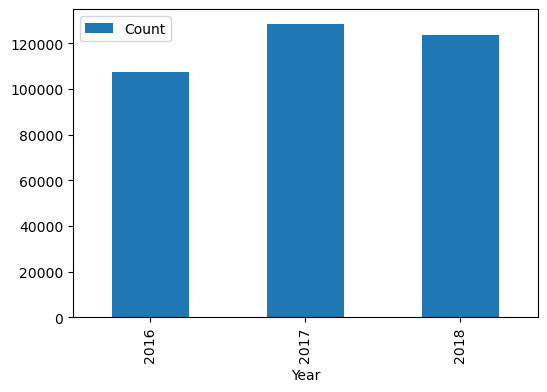

In [38]:
year_count.plot(kind = 'bar', y='Count', x='Year', figsize = (6,4))

In [39]:
cab_users_time_period_yearly_change = master_df.groupby(['Year','Company'])['Company'].count().unstack().reset_index()
cab_users_time_period_yearly_change['Pink_Cab_Change'] = cab_users_time_period_yearly_change['Pink Cab'].pct_change()*100
cab_users_time_period_yearly_change['Yellow_Cab_Change'] = cab_users_time_period_yearly_change['Yellow Cab'].pct_change()*100

In [40]:
cab_users_time_period_yearly_change

Company  Year  Pink Cab  Yellow Cab  Pink_Cab_Change  Yellow_Cab_Change
0        2016     25080       82239              NaN                NaN
1        2017     30321       98189        20.897129          19.394691
2        2018     29310       94253        -3.334323          -4.008596

From 2016 to 2017, we can see an increase of rides, and a slight drop entering 2018.<br>
Entering 2017, Pink Cab experienced an increase of 20.89% of rides, whereas Yellow Cab increased to 19.39%.<br>
Entering 2018, Pink Cab rides decreased 3.33% from last year, and Yellow Cab decreased 4.01% in rides.

___

##### Number of rides per month

In [41]:
cab_users_time_period_monthly = master_df.groupby(['Year','Month','Company'])['Company'].count().unstack().reset_index()
cab_users_time_period_monthly['Pink_Cab_Change'] = cab_users_time_period_monthly['Pink Cab'].pct_change()*100
cab_users_time_period_monthly['Yellow_Cab_Change'] = cab_users_time_period_monthly['Yellow Cab'].pct_change()*100

In [42]:
cab_users_time_period_monthly['Date'] = pd.to_datetime(cab_users_time_period_monthly[['Year', 'Month']].assign(day=1))

In [43]:
cab_users_time_period_monthly_change = cab_users_time_period_monthly.drop(columns=['Pink Cab','Yellow Cab', 'Month', 'Year'])

In [44]:
cab_users_time_period_monthly.describe()

Company         Year     Month     Pink Cab    Yellow Cab  Pink_Cab_Change  \
count      36.000000  36.00000    36.000000     36.000000        35.000000   
mean     2017.000000   6.50000  2353.083333   7630.027778         6.960688   
min      2016.000000   1.00000   927.000000   3719.000000       -52.838063   
25%      2016.000000   3.75000  1499.500000   6035.250000         1.311183   
50%      2017.000000   6.50000  2115.500000   6824.000000        13.250120   
75%      2018.000000   9.25000  3283.750000   9414.250000        21.893786   
max      2018.000000  12.00000  4247.000000  12846.000000        31.769912   
std         0.828079   3.50102   990.835416   2292.234063        21.561909   

Company  Yellow_Cab_Change                 Date  
count            35.000000                   36  
mean              4.892165  2017-06-16 10:40:00  
min             -40.389766  2016-01-01 00:00:00  
25%               1.993236  2016-09-23 12:00:00  
50%               9.373110  2017-06-16 00:00:00  
75%              15.760632  2018-03-08 18:00:00  
max              25.678946  2018-12-01 00:00:00  
std              16.423994                  NaN

In [45]:
master_df.shape

(359392, 19)

In [46]:
master_df.nunique()

Transaction_ID        359392
Date                    1095
Company                    2
City                      19
Kilometers               405
Price                  99176
Cost                   14741
Population                19
Users                     19
Customer_ID            46148
Gender                     2
Age                       48
Monthly_Income_USD     22725
Payment                    2
Year                       3
Month                     12
Profit                142493
State                     13
Miles                    266
dtype: int64

<AxesSubplot:xlabel='Date'>

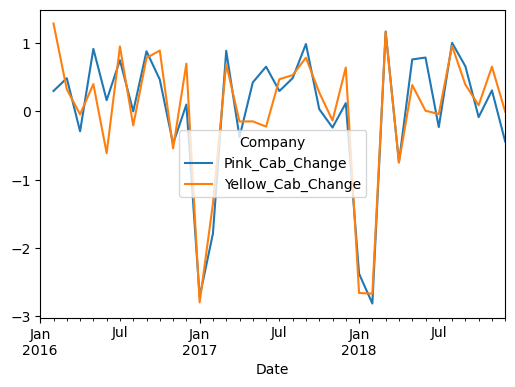

In [47]:
# Make sure 'Date' is in the DataFrame
cab_users_time_period_monthly_change['Date'] = pd.to_datetime(cab_users_time_period_monthly_change['Date'])

# Select only the numeric columns from your DataFrame
numeric_columns = cab_users_time_period_monthly_change.select_dtypes(include=['number'])

# Include the 'Date' column in the numeric_columns DataFrame
numeric_columns['Date'] = cab_users_time_period_monthly_change['Date']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize only the numeric data (excluding 'Date')
standardized_data = scaler.fit_transform(numeric_columns.drop(columns=['Date']))

# Create a DataFrame with the standardized data (excluding 'Date')
standardized_df = pd.DataFrame(standardized_data, columns=numeric_columns.columns[:-1])

# Add the 'Date' column back to the standardized DataFrame
standardized_df['Date'] = cab_users_time_period_monthly_change['Date']

# Plot the data
standardized_df.plot(kind='line', figsize=(6,4), x='Date')


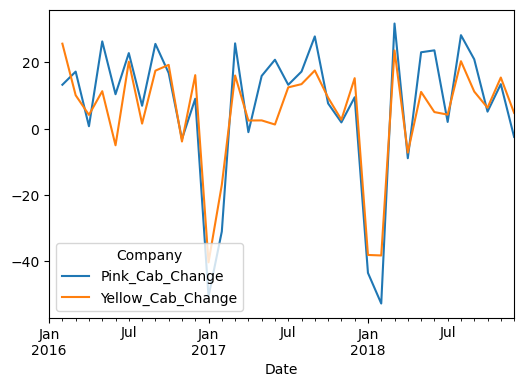

In [48]:
cab_users_time_period_monthly_change.plot(kind='line', figsize=(6,4), x='Date');

In [49]:
company_count = master_df['Company'].value_counts()

<AxesSubplot:xlabel='Company'>

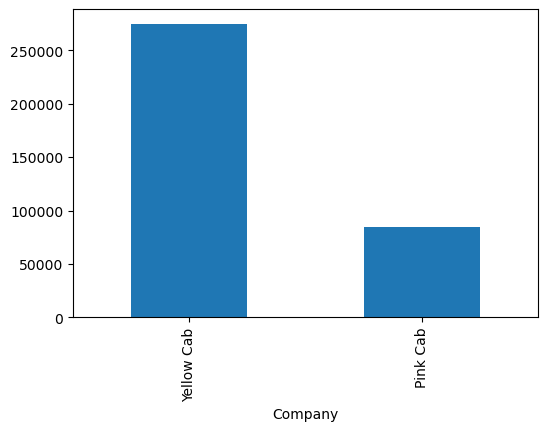

In [50]:
company_count.plot(kind='bar', figsize = (6,4))

In [51]:
print(company_count)
print('')
print('Total Rides from 2016 to 2018:', company_count.values[0] + company_count.values[1])

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

Total Rides from 2016 to 2018: 359392


___

##### Yearly profit by company

In [52]:
profit_yearly = master_df.groupby(['Year','Company'])['Profit'].sum().unstack().reset_index()

In [53]:
profit_yearly

Company  Year    Pink Cab   Yellow Cab
0        2016  1713511.24  13926996.40
1        2017  2033655.03  16575977.40
2        2018  1560161.92  13517398.79

Change in profit Year over Year (YoY)

In [54]:
profit_yearly['Pink_Cab_Change'] = profit_yearly['Pink Cab'].pct_change()*100
profit_yearly['Yellow_Cab_Change'] = profit_yearly['Yellow Cab'].pct_change()*100
profit_yearly = profit_yearly.fillna(0)

In [55]:
profit_yearly

Company  Year    Pink Cab   Yellow Cab  Pink_Cab_Change  Yellow_Cab_Change
0        2016  1713511.24  13926996.40         0.000000           0.000000
1        2017  2033655.03  16575977.40        18.683495          19.020476
2        2018  1560161.92  13517398.79       -23.282863         -18.451875

Yellow Cab profit change from 2016 to 2017 soared 19.02% whereas Pink Cab's profit went up to 18.68%. <br>
Entering 2018, both Yellow Cab and Pink Cab suffered a loss from previous year, down (23.28%) and (18.45%), respectively.

___

##### Number of rides by gender

In [56]:
gender_count = master_df['Gender'].value_counts().sort_index()
gender_count

Gender
Female    153480
Male      205912
Name: count, dtype: int64

<AxesSubplot:xlabel='Gender'>

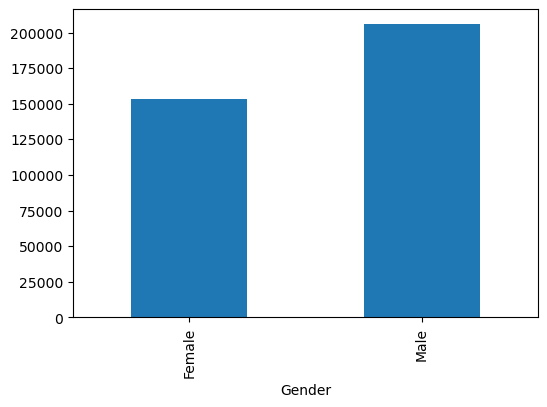

In [57]:
gender_count.plot(kind='bar', figsize = (6,4))

In [58]:
gender_by_company = master_df.groupby(['Gender','Company'])['Gender'].count().unstack().reset_index()

In [59]:
gender_by_company['Total Count'] = gender_by_company['Pink Cab'] + gender_by_company['Yellow Cab']

In [60]:
gender_by_company['Change'] = ((gender_by_company['Yellow Cab'] - gender_by_company['Pink Cab']) / gender_by_company['Yellow Cab'])*100
gender_by_company['Change'] = gender_by_company['Change'].round(2)

In [61]:
gender_by_company['Difference'] = (1-((gender_by_company['Total Count'].sum() - gender_by_company['Total Count'])/gender_by_company['Total Count'].sum()))*100

In [62]:
gender_by_company

Company  Gender  Pink Cab  Yellow Cab  Total Count  Change  Difference
0        Female     37480      116000       153480   67.69   42.705458
1          Male     47231      158681       205912   70.24   57.294542

In [63]:
gender_by_company['Total Count'].sum()

359392

Text(0, 0.5, 'Gender Count')

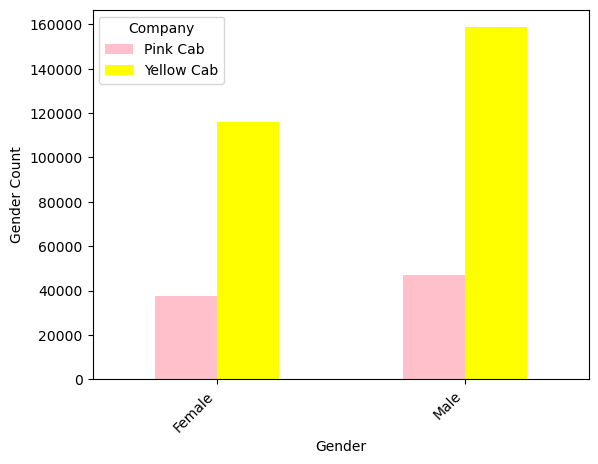

In [64]:
ax = gender_by_company.drop(columns=['Total Count', 'Change', 'Difference']).plot(kind='bar', x='Gender', color=['pink', 'yellow'])
ax.set_xticklabels(gender_by_company['Gender'], rotation=45, ha='right')
ax.set_ylabel('Gender Count')

In this visualization, its evident that Males are higher in number for both Pink and Yellow Cab companies. There is a higher demand for female favoring Yellow Cab over Pink Cab at around 70.24%, as for males, its at 67.69%. <br>

In this segment, Males are higher in numbers accounting for 57.29% of all trips, whereas Females account for 42.71% of all trips.

___

##### Number of rides per state

In [65]:
state_count = pd.DataFrame(master_df['State'].value_counts().sort_values(ascending = True)).reset_index()
state_count.rename(columns={'count':'Count'}, inplace=True)
state_count

State  Count
0     PA   1313
1     TN   3010
2     CO   3825
3     AZ   3995
4     FL   6454
5     GA   7557
6     WA   7997
7     TX  11913
8     MA  29692
9     DC  43737
10    IL  56625
11    CA  83389
12    NY  99885

<AxesSubplot:ylabel='State'>

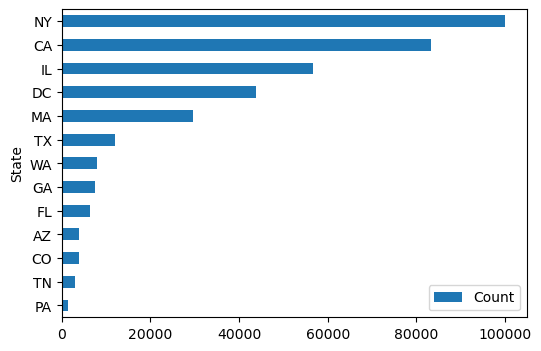

In [66]:
state_count.plot(kind='barh', figsize = (6,4), x= 'State')

<AxesSubplot:ylabel='State'>

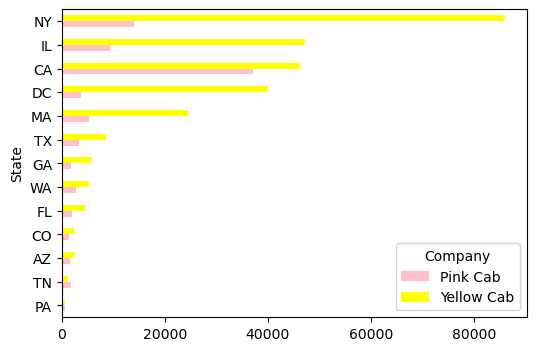

In [67]:
state_count_by_company = master_df.groupby(['State', 'Company'])['Company'].count().unstack().reset_index()
state_count_by_company = state_count_by_company.sort_values(by='Yellow Cab', ascending=True)
state_count_by_company.plot(kind='barh', figsize=(6,4), x='State', color=['pink', 'yellow'])

In [68]:
state_count_by_company

Company State  Pink Cab  Yellow Cab
9          PA       682         631
10         TN      1841        1169
0          AZ      1663        2332
2          CO      1394        2431
4          FL      2002        4452
12         WA      2732        5265
5          GA      1762        5795
11         TX      3248        8665
7          MA      5186       24506
3          DC      3692       40045
1          CA     37181       46208
6          IL      9361       47264
8          NY     13967       85918

___

##### Number of payment method

In [69]:
payment_method_count = master_df.groupby(['Payment','Company'])['Company'].count().unstack().reset_index()

In [70]:
payment_method_count

Company Payment  Pink Cab  Yellow Cab
0          Card     50719      164785
1          Cash     33992      109896

<AxesSubplot:xlabel='Payment'>

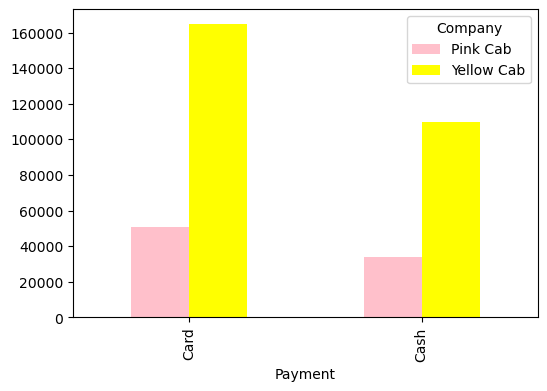

In [71]:
payment_method_count.plot(kind='bar', figsize=(6,4), x='Payment', color=['pink', 'yellow'])

___

<font size = '4'><b> Exploratory Data Analysis (EDA) </b> <i> using Master Dataframe </i></font>

<AxesSubplot:xlabel='Price', ylabel='Count'>

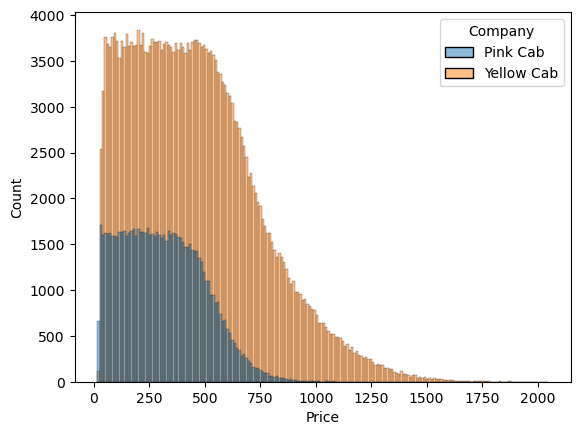

In [72]:
sns.histplot(data=master_df, x ="Price", hue="Company")

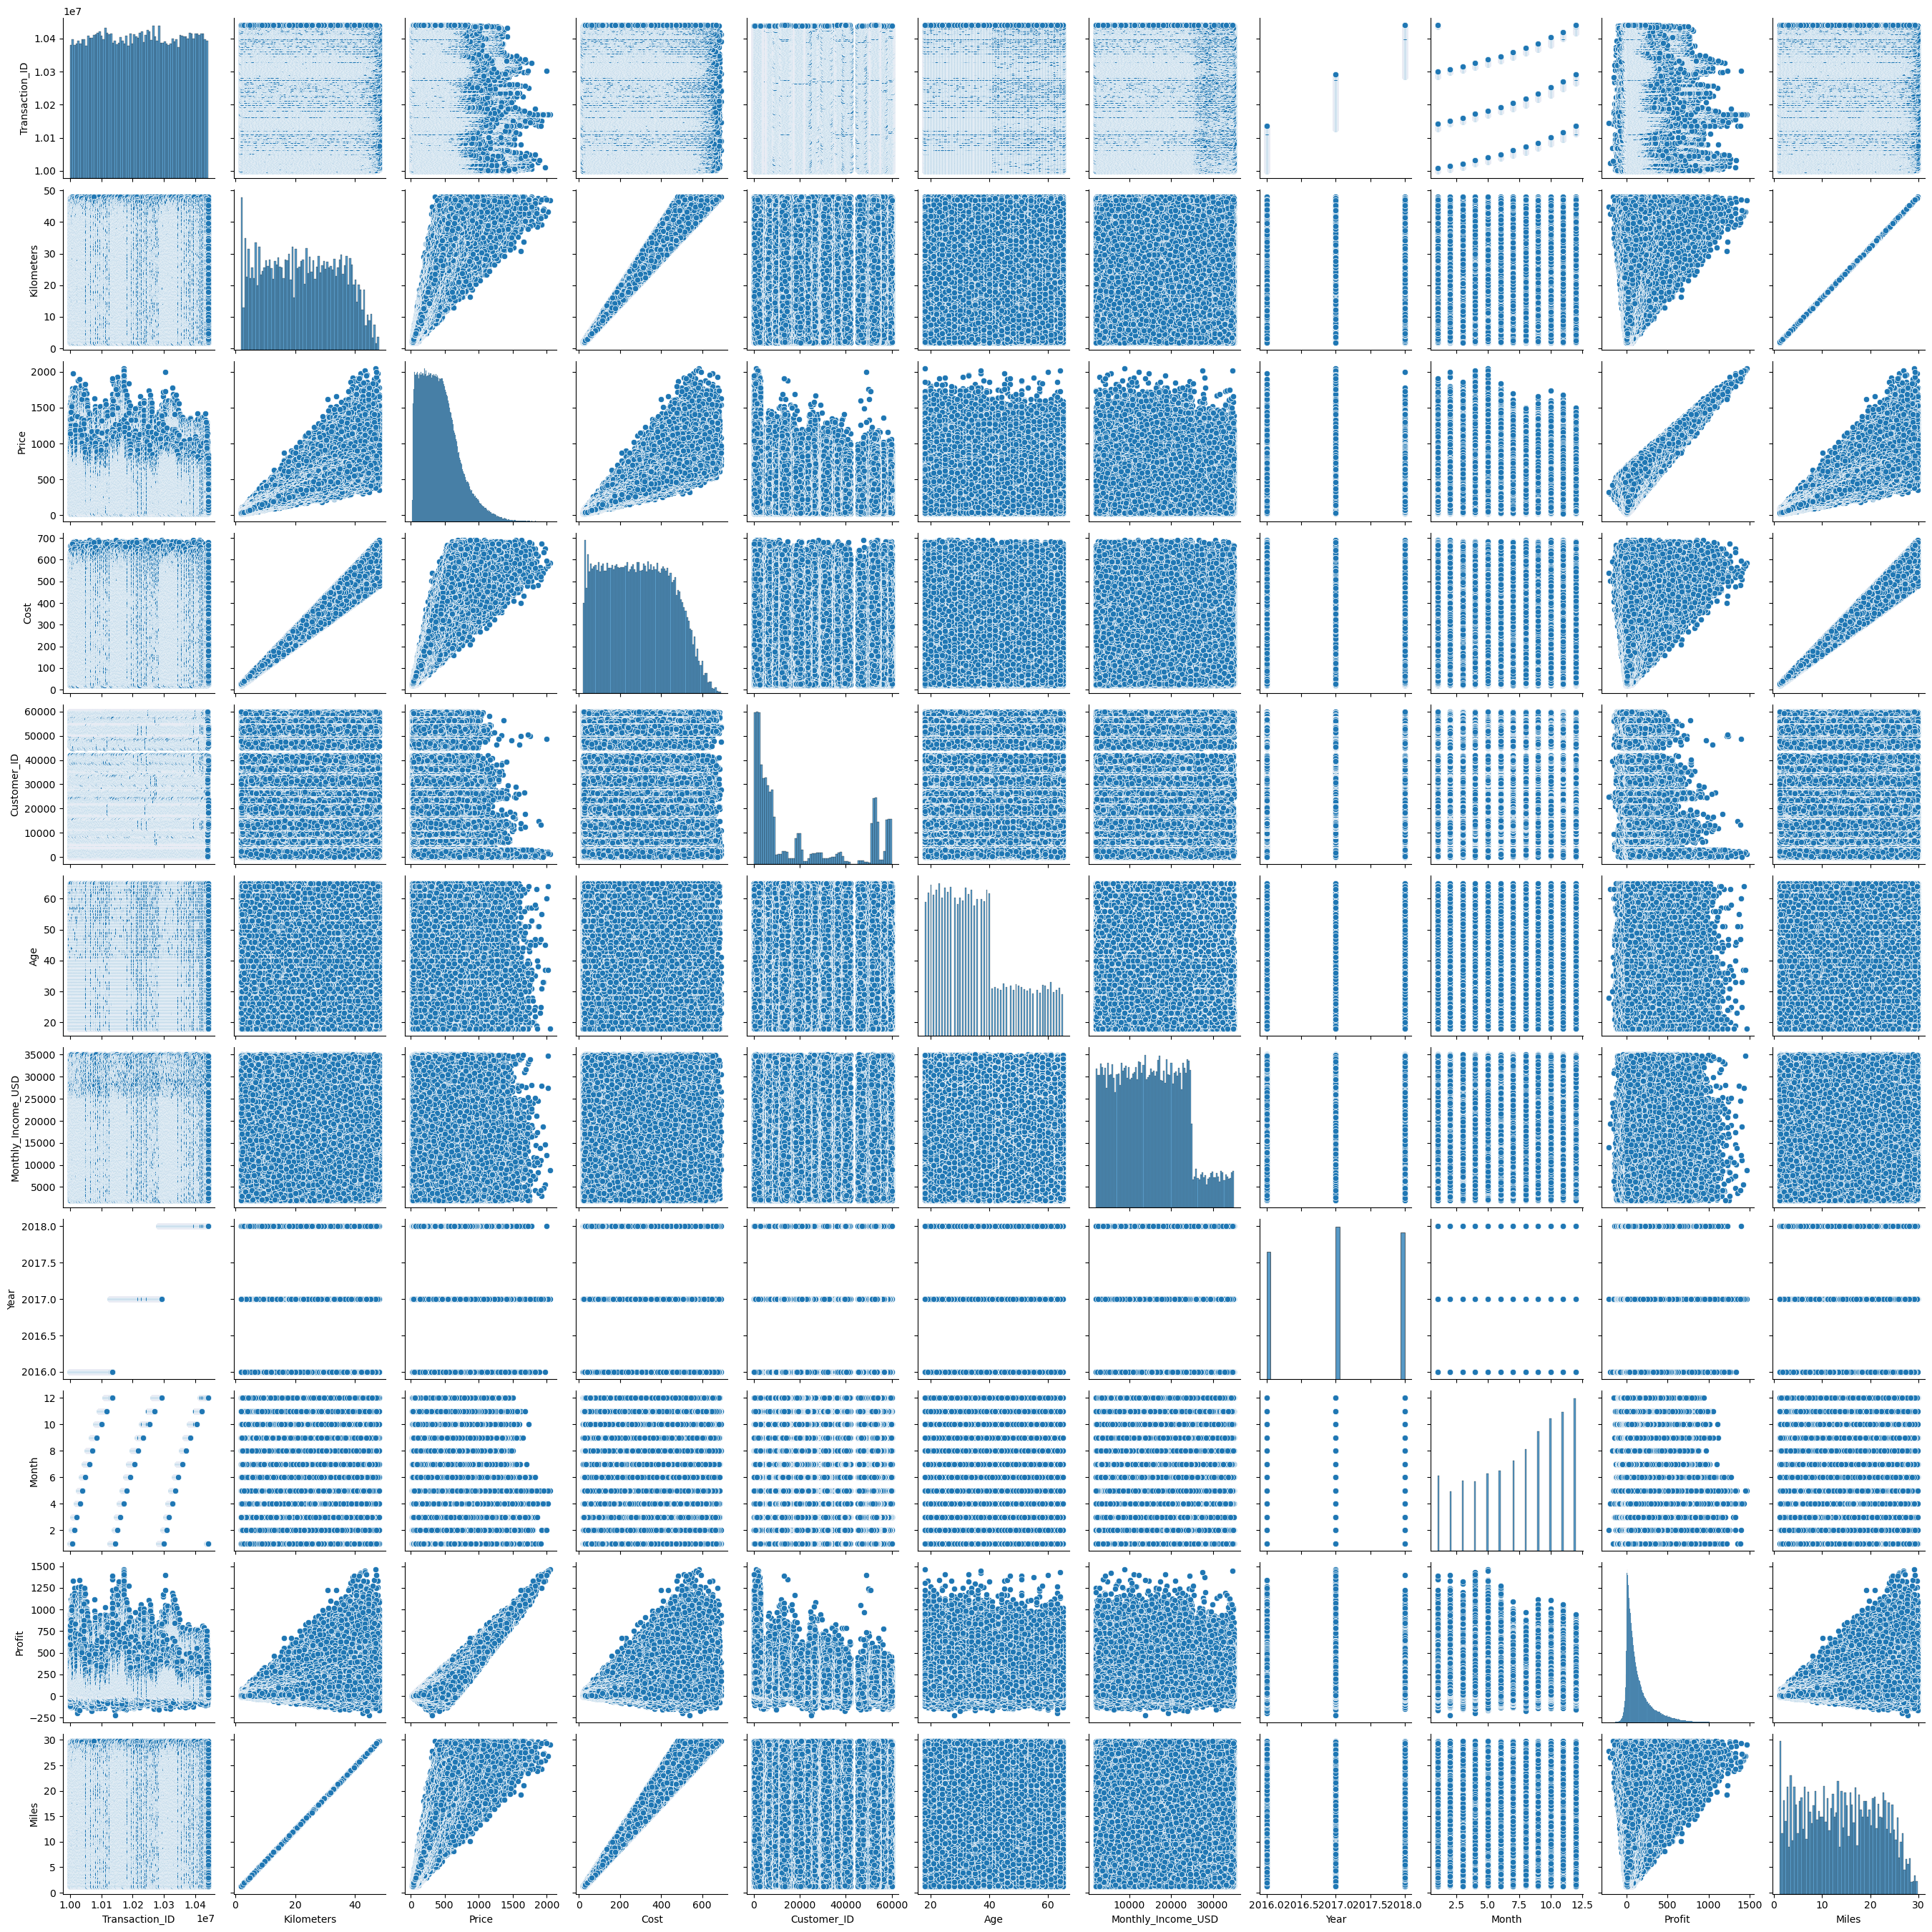

In [73]:
sns.pairplot(master_df)

In [74]:
master_df.columns

Index(['Transaction_ID', 'Date', 'Company', 'City', 'Kilometers', 'Price',
       'Cost', 'Population', 'Users', 'Customer_ID', 'Gender', 'Age',
       'Monthly_Income_USD', 'Payment', 'Year', 'Month', 'Profit', 'State',
       'Miles'],
      dtype='object')

In [75]:
heatmap_master_column_drop = master_df.drop(columns=['Population','Users','Transaction_ID', 'Date', 'Company', 'Customer_ID', 'Gender', 'State', 'City', 'Payment'])

In [76]:
heatmap_master_column_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Kilometers          359392 non-null  float64
 1   Price               359392 non-null  float64
 2   Cost                359392 non-null  float64
 3   Age                 359392 non-null  int64  
 4   Monthly_Income_USD  359392 non-null  int64  
 5   Year                359392 non-null  int32  
 6   Month               359392 non-null  int32  
 7   Profit              359392 non-null  float64
 8   Miles               359392 non-null  float64
dtypes: float64(5), int32(2), int64(2)
memory usage: 21.9 MB


In [77]:
heatmap_master_column_drop

Kilometers   Price    Cost  Age  Monthly_Income_USD  Year  Month  \
0             30.4  370.95  313.64   28               10813  2016      1   
1             28.6  358.52  334.85   27                9237  2016      1   
2              9.0  125.20   97.63   53               11242  2016      1   
3             33.2  377.40  351.60   23               23327  2016      1   
4              8.7  114.62   97.78   33                8536  2016      1   
...            ...     ...     ...  ...                 ...   ...    ...   
359387         4.8   69.24   63.36   24               15651  2018      1   
359388         8.4  113.75  106.85   32                6528  2018      1   
359389        27.8  437.07  349.65   56                7966  2018      1   
359390         8.8  146.19  114.05   32                6423  2018      1   
359391        12.8  191.58  177.62   20               11284  2018      1   

        Profit  Miles  
0        57.31   18.9  
1        23.67   17.8  
2        27.57    5.6  
3        25.80   20.6  
4        16.84    5.4  
...        ...    ...  
359387    5.88    3.0  
359388    6.90    5.2  
359389   87.42   17.3  
359390   32.14    5.5  
359391   13.96    8.0  

[359392 rows x 9 columns]

In [78]:
heatmap_master_df_5000 = heatmap_master_column_drop.iloc[:5000]

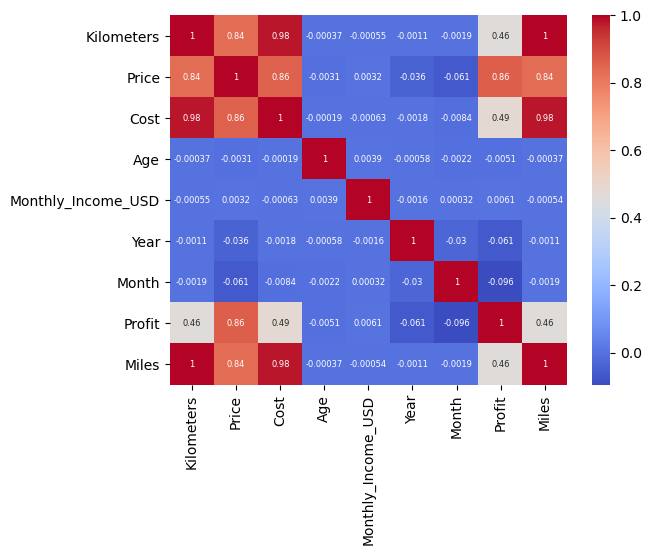

In [89]:
sns.heatmap(heatmap_master_column_drop.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

<AxesSubplot:xlabel='Miles', ylabel='Cost'>

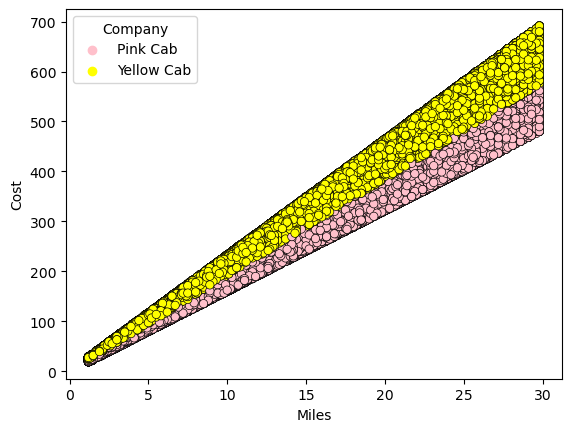

In [90]:
sns.scatterplot(data=master_df,x='Miles', y='Cost', hue='Company', palette={'Yellow Cab':'yellow', 'Pink Cab':'pink'}, edgecolor='black')

In the scatterplot above, there is a strong positive correlation between the amount of Miles travelled and the Cost of travel. The above data takes into the account both companies.

<AxesSubplot:xlabel='Miles', ylabel='Price'>

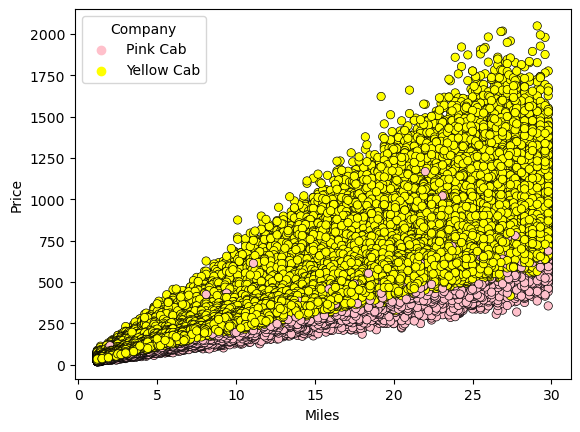

In [91]:
sns.scatterplot(data=master_df,x='Miles', y='Price', hue='Company', palette={'Yellow Cab':'yellow', 'Pink Cab':'pink'}, edgecolor='black')

<AxesSubplot:xlabel='Miles', ylabel='Profit'>

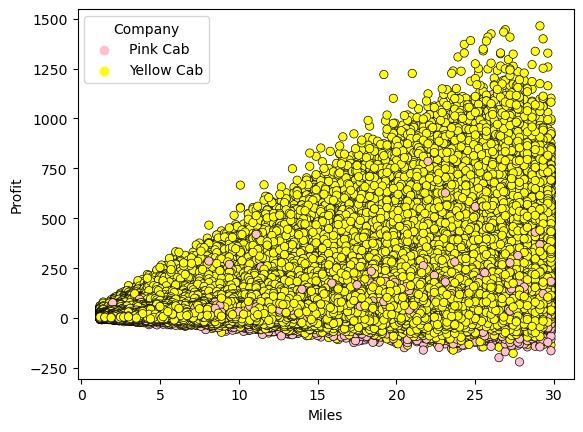

In [92]:
sns.scatterplot(data=master_df,x='Miles', y='Profit', hue='Company', palette={'Yellow Cab':'yellow', 'Pink Cab':'pink'}, edgecolor='black')

<AxesSubplot:xlabel='Profit', ylabel='Count'>

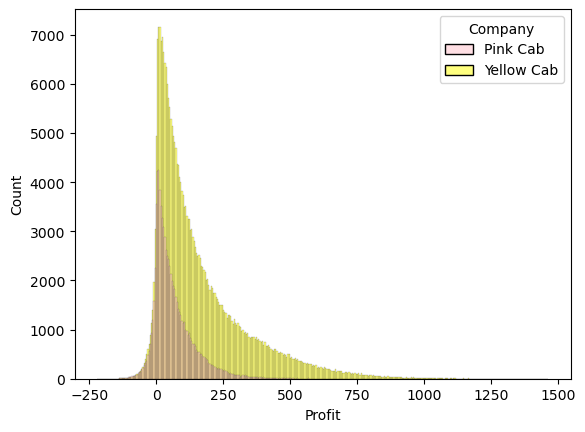

In [93]:
sns.histplot(data=master_df, x='Profit', hue='Company', palette={'Yellow Cab':'yellow', 'Pink Cab':'pink'}, edgecolor='black')

This histoplot shows a postive skew distribution between the profit by company.

___

<b><u>Statistical Description of the Master Dataframe</u></b>

In [ ]:
master_df.drop(columns=['Transaction_ID','Customer_ID']).describe()

In [ ]:
master_df.head(3)

___

In [ ]:
# payment_method = master_df.groupby(['Company','Payment_Mode'])['Payment_Mode'].count().unstack()
# fig, ax = plt.subplots(figsize=(10, 6))
# payment_method.plot.bar(ax=ax)
# plt.title("Payment Method by Company", weight='bold')
# plt.ylabel("Payment Type Count")
# plt.xlabel("Company")
# plt.xticks(rotation=0)
# plt.show()